In [1]:
using Flux, Statistics
using Flux: crossentropy, throttle, logitcrossentropy
using Base.Iterators: repeated, partition, flatten
using DelimitedFiles
using LinearAlgebra
using RDatasets
using GLM
using BSON: @save, @load
using Random
using Base.Threads 
using Plots

┌ Warning: The NVIDIA driver on this system only supports up to CUDA 11.0.0.
│ For performance reasons, it is recommended to upgrade to a driver that supports CUDA 11.2 or higher.
└ @ CUDA /home/jupyter-tegan/.julia/packages/CUDA/mVgLI/src/initialization.jl:42


In [2]:
import Pkg; Pkg.add("BSON")

In [3]:
import Pkg; Pkg.add("RDatasets")

In [4]:
import Pkg; Pkg.add("GLM")

In [5]:
function getEdepGateBarA0(number, angle)
    folder = "/home/jupyter-tegan/dosimeter/gate_data/bars/"
    angle = lpad(angle,3, "0")
    fileName = filter(x->occursin(string("A", angle), x), readdir(folder))[number]
    filePath = string(folder, fileName)
    return Int.(round.(reshape(readdlm(filePath)[4:67,2], (8,8))))
end

getEdepGateBarA0 (generic function with 1 method)

In [6]:
getEdepGateBarA0(99, 20)

8×8 Matrix{Int64}:
 4105  18040  21312  22317  21102  15292  2051  305
 2821  18380  24004  25514  23310  18482  3202  443
 1648  15313  23734  22938  21710  20005  5106  430
  914  11079  20395  19492  20376  18048  6919  352
  586   6897  15963  16357  16117  14829  7610  258
  285   3008  11629  12203  11639  11110  7287  239
  111    877   6657   7339   6894   6265  5149  256
   83    191   2393   2613   2678   2396  2122  114

In [7]:
function getEdepGateBarA90(number, angle)
    folder = "/home/jupyter-tegan/dosimeter/gate_data/bars/"
    angle90 = lpad(angle+90, 3, "0")
    fileName90 = filter(x->occursin(string("A", angle90), x), readdir(folder))[number]
    filePath90 = string(folder, fileName90)
    return return Int.(round.(reshape(readdlm(filePath90)[4:67,2], (8,8))))
end

getEdepGateBarA90 (generic function with 1 method)

In [8]:
getEdepGateBarA90(4, 260)

8×8 Matrix{Int64}:
  94  326  3399  32876  44639  17791  1413  293
 108  403  4499  38496  47463  16337  1105  278
 108  402  5168  40147  44923  11886  1042  220
 104  342  5097  37481  37523   7540   616  170
  85  283  5600  32072  29785   4214   395  115
  63  201  4587  24232  21585   2101   233  102
  40  137  3726  14207  11905    828   237   80
  37   99  1621   5062   4113    295   113   61

In [9]:
function getEdepGateGrid(number, angle)
    folder = "/home/jupyter-tegan/dosimeter/gate_data/cubes/"
    angle = lpad(angle, 3, "0")
    fileName = filter(x->occursin(string("A", angle), x), readdir(folder))[number]
    filePath = string(folder, fileName)
    return Int.(round.(readdlm(filePath)[4:515,2]))
end

getEdepGateGrid (generic function with 1 method)

In [10]:
getEdepGateGrid(1, 40)

512-element Vector{Int64}:
  73
  52
  20
  15
  10
  19
   7
   9
 117
  96
  92
  48
  42
   ⋮
   8
   6
   2
  17
   3
   5
   3
   3
   4
   5
   5
   3

dosimeter/gate_data/bars/W05__H05__A000_bars_extracted.txt

In [11]:
function getEdepOhioBarA0(number)
    folder = "/home/jupyter-tegan/dosimeter/ohio_data/extracted_data/"
    fileName = filter(x->occursin(r"R...txt", x), readdir(folder))[number]
    filePath = string(folder,fileName)
    return Int.(round.(reshape(readdlm(filePath)[4:67,2], (8,8))))
end

getEdepOhioBarA0 (generic function with 1 method)

In [12]:
getEdepOhioBarA0(1)

8×8 Matrix{Int64}:
 38484  42128  52850  126117  208366  54216  42413  38391
 39382  44555  47446  118228  285328  61556  41870  39128
 36595  39956  55851  189571  294911  57231  42411  38908
 38021  43502  45917  122588  483994  71271  40778  39157
 40115  46611  55757  176140  345909  74524  42913  39929
 39228  38664  58439  162217  244550  68536  43572  39139
 37466  37933  56898  131986  361086  60613  48624  37953
 35604  38155  43116   84692  184161  70698  43053  37902

In [13]:
function getEdepOhioBarA90(number)
    folder = "/home/jupyter-tegan/dosimeter/ohio_data/extracted_data/"
    fileName = filter(x->occursin(r"R.._r.txt", x), readdir(folder))[number]
    filePath = string(folder,fileName)
    return Int.(round.(reshape(readdlm(filePath)[4:67,2], (8,8))))
end

getEdepOhioBarA90 (generic function with 1 method)

In [14]:
getEdepOhioBarA90(1)

8×8 Matrix{Int64}:
 19404  22059  44432  101296   77978  36257  21430  19332
 20006  24228  42568   87020  105097  53825  21343  20054
 17905  20826  56275  160868  105372  47073  21694  19664
 19379  23974  36643   91733  144345  65212  20635  20134
 20977  26756  56546  140444  126791  68834  22822  20629
 20002  20012  61299  128934   87739  61529  22612  20076
 18627  19083  62967   99105  119800  47310  25929  19225
 17006  19348  31036   58054   65617  59364  22150  18946

In [15]:
function normalize(inputArray)
    min = minimum(inputArray)
    inputArray = inputArray.-min
    max = maximum(inputArray)/2048
    inputArray = inputArray./max
    return Int.(round.(inputArray))
end

normalize (generic function with 1 method)

In [16]:
normalize(getEdepOhioBarA90(1))

8×8 Matrix{Int64}:
 34   72  390  1200   868  274   63  33
 43  103  364   997  1254  524   62  43
 13   54  559  2048  1258  428   67  38
 34   99  280  1064  1813  686   52  45
 57  139  563  1757  1563  738   83  52
 43   43  631  1593  1007  634   80  44
 23   30  654  1169  1463  431  127  32
  0   33  200   584   692  603   73  28

In [17]:
normalize(getEdepOhioBarA0(1))

8×8 Matrix{Int64}:
 13  30   79  413   789   85  31  13
 17  41   54  377  1141  119  29  16
  5  20   92  703  1184   99  31  15
 11  36   47  397  2048  163  24  16
 21  50   92  642  1417  178  33  20
 17  14  104  578   954  150  36  16
  9  11   97  440  1487  114  59  11
  0  12   34  224   679  160  34  10

In [18]:
function makeTrainingData()
    folder = "/home/jupyter-tegan/dosimeter/gate_data/bars/"
    trainingSize = size(filter(x->occursin("A000", x), readdir(folder)))[1]
    trainingArray = Array{Int64}(undef, 8, 8, 2, trainingSize*20)
    for i = 1:trainingSize
        for r = 1:20
            trainingArray[:, :, 1, (i-1)*20 + r] = getEdepGateBarA0(i, (r-1)*10 + 80)
            trainingArray[:, :, 2, (i-1)*20 + r] = getEdepGateBarA90(i, (r-1)*10 + 80)
        end
    end
    return trainingArray
end

makeTrainingData (generic function with 1 method)

In [19]:
function makeValidationData()
    folder = "/home/jupyter-tegan/dosimeter/gate_data/bars/"
    trainingSize = size(filter(x->occursin("A000", x), readdir(folder)))[1]
    trainingArray = Array{Int64}(undef, 8, 8, 2, trainingSize*4)
    for i = 1:trainingSize
        for r = 1:4
            trainingArray[:, :, 1, (i-1)*4 + r] = getEdepGateBarA0(i, (r-1)*20)
            trainingArray[:, :, 2, (i-1)*4 + r] = getEdepGateBarA90(i, (r-1)*20)
        end
    end
    return trainingArray
end

makeValidationData (generic function with 1 method)

In [20]:
makeTrainingData()

8×8×2×2000 Array{Int64, 4}:
[:, :, 1, 1] =
  9170   8358   5422   4006   2562   1218    555    191
 20724  19208  14570  10487   6484   2829    905    293
 42111  48282  40117  31403  19426   9066   2454    516
 32283  54028  71672  80224  68196  37001  10292   1547
 13949  21509  37565  62410  89673  95727  58686  13084
  6226   8960  13750  20601  27373  37069  44280  22398
  2926   4154   5177   7104   7499   7447   5213   1628
  1769   1980   2113   2525   2556   1993   1433    420

[:, :, 2, 1] =
  46  139   198    989  10083   246   79   36
  83  206   387   6528  24388   442  120   44
 124  217   589  18710  34557   665  164   56
  91  287  1324  33323  39093  1014  287  102
 130  371  2112  47710  39086  1376  268  112
 232  524  4267  61904  36620  1652  388  145
 245  747  5833  74386  31265  2032  363  119
 293  841  6712  71778  22411  1488  301  134

[:, :, 1, 2] =
  3407   3652   3504   2943   2108   1229    634    306
  7252   8270   9031   7918   6283   3478   1774    5

In [21]:
normalize(makeTrainingData())

8×8×2×2000 Array{Int64, 4}:
[:, :, 1, 1] =
 193   176   114    84    54    25    11    4
 437   405   307   221   136    59    19    6
 889  1019   847   663   410   191    51   10
 681  1141  1513  1694  1440   781   217   32
 294   454   793  1318  1893  2021  1239  276
 131   189   290   435   578   782   935  473
  61    87   109   150   158   157   110   34
  37    41    44    53    54    42    30    8

[:, :, 2, 1] =
 1   2    4    20  212   5  1  0
 1   4    8   137  515   9  2  0
 2   4   12   395  729  14  3  1
 1   6   27   703  825  21  6  2
 2   7   44  1007  825  29  5  2
 4  11   90  1307  773  34  8  3
 5  15  123  1570  660  42  7  2
 6  17  141  1515  473  31  6  2

[:, :, 1, 2] =
  71    77    74    62    44    25    13    6
 153   174   190   167   132    73    37   11
 370   450   492   504   454   316   139   29
 813  1092  1314  1525  1641  1520  1037  357
 773  1099  1309  1479  1626  1509  1019  346
 362   429   497   487   459   329   151   34
 164   175   187 

In [22]:
# starts at 80 deg and ends at 270 in increments of 10 deg, which is why there is 20*trainingsize, no repeats
function makeTargetData()
    folder = "/home/jupyter-tegan/dosimeter/gate_data/cubes/"
    trainingSize = size(filter(x->occursin("A000", x), readdir(folder)))[1]
    trainingArray = Array{Int64}(undef, 8*8*8, trainingSize*20) 
    for i = 1:trainingSize
        for r = 1:20
            trainingArray[:,(i-1)*20 + r] = getEdepGateGrid(i, (r-1)*10+80)
        end
    end
    return trainingArray
end

makeTargetData (generic function with 1 method)

In [23]:
function makeValTargetData()
    folder = "/home/jupyter-tegan/dosimeter/gate_data/cubes/"
    trainingSize = size(filter(x->occursin("A000", x), readdir(folder)))[1]
    trainingArray = Array{Int64}(undef, 8*8*8, trainingSize*4)
    for i = 1:trainingSize
        for r = 1:4
            trainingArray[:,(i-1)*4 + r] = getEdepGateGrid(i, (r-1)*20)
        end
    end
    return trainingArray
end

makeValTargetData (generic function with 1 method)

In [24]:
makeTargetData()

512×2000 Matrix{Int64}:
  76   57   41   34   37   10  10    5  …     6     6    10     9     9     8
 124   74   96   43   35   31  26   30       10    49    10    13    11    16
  84  101  119   73   35   25  16   13       26    85    11    26    35    25
  79  117  144  100   42   29  19   22       17    53    13    22    31    13
 102  130  127   97   74   30  15   11        8    30    13    29    30    43
  65  115   99  127   93   47  19   18  …    38    23    55    12    19    21
  93  153   79  140  112   49  23   19        8    11    40    11    13     9
  75   88   30  127  115   30  58  101       15     9    11    14    11    11
 219  168  152  111   59   57  16    4      194   325   298   260   350   332
 337  145  201  120   42   30  32   15      384   637   638   533   263   266
 413  283  251  273   96   37  16   18  …   614   760   811   657   340   217
 349  345  415  267  113  103  57   31      542   703   395   495   331   334
 318  396  414  307  139  154  63   25  

In [25]:
function makeInputData()
    folder = "/home/jupyter-tegan/dosimeter/ohio_data/extracted_data/"
    trainingSize = size(filter(x->occursin("_r.txt", x), readdir(folder)))[1]
    trainingArray = Array{Int64}(undef, 8, 8, 2, trainingSize) #the 2 is for the 0 & 90 degree angles
    for i = 1:trainingSize
        trainingArray[:,:,1,i] = getEdepOhioBarA0(i)
        trainingArray[:,:,2,i] = getEdepOhioBarA90(i)
    end
    return trainingArray
end

makeInputData (generic function with 1 method)

In [26]:
makeInputData()

8×8×2×21 Array{Int64, 4}:
[:, :, 1, 1] =
 38484  42128  52850  126117  208366  54216  42413  38391
 39382  44555  47446  118228  285328  61556  41870  39128
 36595  39956  55851  189571  294911  57231  42411  38908
 38021  43502  45917  122588  483994  71271  40778  39157
 40115  46611  55757  176140  345909  74524  42913  39929
 39228  38664  58439  162217  244550  68536  43572  39139
 37466  37933  56898  131986  361086  60613  48624  37953
 35604  38155  43116   84692  184161  70698  43053  37902

[:, :, 2, 1] =
 19404  22059  44432  101296   77978  36257  21430  19332
 20006  24228  42568   87020  105097  53825  21343  20054
 17905  20826  56275  160868  105372  47073  21694  19664
 19379  23974  36643   91733  144345  65212  20635  20134
 20977  26756  56546  140444  126791  68834  22822  20629
 20002  20012  61299  128934   87739  61529  22612  20076
 18627  19083  62967   99105  119800  47310  25929  19225
 17006  19348  31036   58054   65617  59364  22150  18946

[:, :, 1, 2] =

In [27]:
normalize(makeInputData())

8×8×2×21 Array{Int64, 4}:
[:, :, 1, 1] =
 31  34  43  104  173  45  35  31
 32  36  39   98  237  51  34  32
 30  33  46  157  244  47  35  32
 31  36  38  101  402  59  33  32
 33  38  46  146  287  61  35  33
 32  32  48  134  203  56  36  32
 31  31  47  109  299  50  40  31
 29  31  35   70  152  58  35  31

[:, :, 2, 1] =
 16  18  36   84   64  30  17  16
 16  20  35   72   87  44  17  16
 14  17  46  133   87  39  18  16
 16  19  30   76  119  54  17  16
 17  22  46  116  105  57  18  17
 16  16  50  107   72  51  18  16
 15  15  52   82   99  39  21  15
 14  16  25   48   54  49  18  15

[:, :, 1, 2] =
 16  18  22  120   70  20  17  16
 16  18  19  103   85  19  17  16
 15  17  23  185   96  19  17  16
 16  18  19  105  133  21  16  16
 17  19  22  163  108  22  17  17
 16  16  24  147   82  21  17  16
 16  16  23  111  135  20  19  16
 15  16  18   63   74  22  17  16

[:, :, 2, 2] =
 12  13  30   73   55  24  13  12
 12  15  29   62   75  37  13  12
 11  13  38  110   75  32  

In [28]:
trainingArray = makeTrainingData()

8×8×2×2000 Array{Int64, 4}:
[:, :, 1, 1] =
  9170   8358   5422   4006   2562   1218    555    191
 20724  19208  14570  10487   6484   2829    905    293
 42111  48282  40117  31403  19426   9066   2454    516
 32283  54028  71672  80224  68196  37001  10292   1547
 13949  21509  37565  62410  89673  95727  58686  13084
  6226   8960  13750  20601  27373  37069  44280  22398
  2926   4154   5177   7104   7499   7447   5213   1628
  1769   1980   2113   2525   2556   1993   1433    420

[:, :, 2, 1] =
  46  139   198    989  10083   246   79   36
  83  206   387   6528  24388   442  120   44
 124  217   589  18710  34557   665  164   56
  91  287  1324  33323  39093  1014  287  102
 130  371  2112  47710  39086  1376  268  112
 232  524  4267  61904  36620  1652  388  145
 245  747  5833  74386  31265  2032  363  119
 293  841  6712  71778  22411  1488  301  134

[:, :, 1, 2] =
  3407   3652   3504   2943   2108   1229    634    306
  7252   8270   9031   7918   6283   3478   1774    5

In [29]:
normalize(makeTrainingData())

8×8×2×2000 Array{Int64, 4}:
[:, :, 1, 1] =
 193   176   114    84    54    25    11    4
 437   405   307   221   136    59    19    6
 889  1019   847   663   410   191    51   10
 681  1141  1513  1694  1440   781   217   32
 294   454   793  1318  1893  2021  1239  276
 131   189   290   435   578   782   935  473
  61    87   109   150   158   157   110   34
  37    41    44    53    54    42    30    8

[:, :, 2, 1] =
 1   2    4    20  212   5  1  0
 1   4    8   137  515   9  2  0
 2   4   12   395  729  14  3  1
 1   6   27   703  825  21  6  2
 2   7   44  1007  825  29  5  2
 4  11   90  1307  773  34  8  3
 5  15  123  1570  660  42  7  2
 6  17  141  1515  473  31  6  2

[:, :, 1, 2] =
  71    77    74    62    44    25    13    6
 153   174   190   167   132    73    37   11
 370   450   492   504   454   316   139   29
 813  1092  1314  1525  1641  1520  1037  357
 773  1099  1309  1479  1626  1509  1019  346
 362   429   497   487   459   329   151   34
 164   175   187 

In [30]:
targetArray = makeTargetData()

512×2000 Matrix{Int64}:
  76   57   41   34   37   10  10    5  …     6     6    10     9     9     8
 124   74   96   43   35   31  26   30       10    49    10    13    11    16
  84  101  119   73   35   25  16   13       26    85    11    26    35    25
  79  117  144  100   42   29  19   22       17    53    13    22    31    13
 102  130  127   97   74   30  15   11        8    30    13    29    30    43
  65  115   99  127   93   47  19   18  …    38    23    55    12    19    21
  93  153   79  140  112   49  23   19        8    11    40    11    13     9
  75   88   30  127  115   30  58  101       15     9    11    14    11    11
 219  168  152  111   59   57  16    4      194   325   298   260   350   332
 337  145  201  120   42   30  32   15      384   637   638   533   263   266
 413  283  251  273   96   37  16   18  …   614   760   811   657   340   217
 349  345  415  267  113  103  57   31      542   703   395   495   331   334
 318  396  414  307  139  154  63   25  

In [31]:
validationArray = makeValidationData()

8×8×2×400 Array{Int64, 4}:
[:, :, 1, 1] =
 156  602  3357  47177  49641  3200  553  319
 173  487  3189  50404  52208  2689  436  185
 118  408  2431  47899  48697  2149  378  125
 104  346  1692  41691  42963  1698  407  121
  80  236  1260  35193  34956  1046  276   91
  74  159   666  25635  25201   441  157   90
  71  149   388  15401  14209   307  130   68
  47   82   169   5458   5147   167   93   60

[:, :, 2, 1] =
  3407   3652   3504   2943   2108   1229    634    306
  7252   8270   9031   7918   6283   3478   1774    536
 17556  21327  23314  23906  21516  14988   6625   1417
 38528  51735  62227  72250  77709  71983  49111  16929
 36626  52070  62017  70057  77001  71472  48275  16420
 17159  20352  23544  23097  21780  15578   7169   1626
  7771   8329   8868   8556   6322   3924   1689    477
  3580   3925   3563   2912   2048   1350    624    277

[:, :, 1, 2] =
 397  1912  18263  73657  10080   907  245   70
 479  1689  13766  82490  16289  1328  273   88
 406  1238   7

In [32]:
validationTargetArray = makeValTargetData()

512×400 Matrix{Int64}:
  5  31   73   95  25  25   24  108  16  …   230   207   11   55   252   306
  3  38   52  117   5  25   29   88   2      119   372    9   66   237   319
  9  17   20   63   5  37   36   75   6       96   315   33   50   219   259
 10  13   15  100   5   9   24   58   6       43   289    9  112   110   252
  2   7   10   70   2   5   26   41   4       53   193   10   43    42   225
  4   7   19   59   0   5   10   30   2  …    30   176    5   35    22    99
  8   3    7   40   3   5   27   24   0       13   197    7   33    18    84
  1   6    9   16   2   1   30   24   0       10    44    1   18    41    38
  8  34  117  328  26  46  136  275  27     1853  1295  106  873  1952  1395
  8  26   96  233  11  68  110  271  11     2066  1626  130  565  2062  1617
 10  31   92  269  16  63   64  250  39  …  1567  2275   72  329  1777  1849
  5  14   48  287  20  18   59  216  20      700  2199   57  198  1176  2130
 25   6   42  205  10  12   79  182  19      254  216

In [33]:
inputArray = makeInputData()

8×8×2×21 Array{Int64, 4}:
[:, :, 1, 1] =
 38484  42128  52850  126117  208366  54216  42413  38391
 39382  44555  47446  118228  285328  61556  41870  39128
 36595  39956  55851  189571  294911  57231  42411  38908
 38021  43502  45917  122588  483994  71271  40778  39157
 40115  46611  55757  176140  345909  74524  42913  39929
 39228  38664  58439  162217  244550  68536  43572  39139
 37466  37933  56898  131986  361086  60613  48624  37953
 35604  38155  43116   84692  184161  70698  43053  37902

[:, :, 2, 1] =
 19404  22059  44432  101296   77978  36257  21430  19332
 20006  24228  42568   87020  105097  53825  21343  20054
 17905  20826  56275  160868  105372  47073  21694  19664
 19379  23974  36643   91733  144345  65212  20635  20134
 20977  26756  56546  140444  126791  68834  22822  20629
 20002  20012  61299  128934   87739  61529  22612  20076
 18627  19083  62967   99105  119800  47310  25929  19225
 17006  19348  31036   58054   65617  59364  22150  18946

[:, :, 1, 2] =

In [34]:
function plotResults(m)
    image = rand((1: size(inputArray)[4]))
    print(image)
    display(heatmap(reshape(m(validationArray)[:,image], (8,8*8)), xlabel="Length/Height", ylabel="Width", title="GATE Prediction"))
    display(heatmap(reshape(validationTargetArray[:,image], (8,8*8)), xlabel="Length/Height", ylabel="Width", title="GATE Target"))
    display(heatmap(reshape(m(inputArray)[:,image], (8,8*8)), xlabel="Length/Height", ylabel="Width", title="Ohio Data Prediction"))
end

plotResults (generic function with 1 method)

In [35]:
plotResults(m)

LoadError: UndefVarError: m not defined

In [52]:
m = Chain(Conv((2,2), 2=>16, pad=(1,1), relu),
        x -> reshape(x, :, size(x,4)), 
        
        Dense(1296, 1743), #Dense(channel#, same as third #)
        
        Dense(1743, 8*8*8)) 
        

Chain(Conv((2, 2), 2=>16, relu), #49, Dense(1296, 1743), Dense(1743, 512))

In [53]:
loss(x, y) = mean((m(x)-y).^2)
opt = ADAM()
dataset = (repeated((trainingArray, targetArray), 100))
evalcb = () -> @show (loss(trainingArray, targetArray)) 
CurrentR2 = r2(lm(@formula(A  ~ B), DataFrame(A=Float64.(m(trainingArray)[:,1]), B=targetArray[:,1])))
print("Training R2: ", CurrentR2, '\n')
CurrentVR2 = r2(lm(@formula(A  ~ B), DataFrame(A=Float64.(m(validationArray)[:,1]), B=validationTargetArray[:,1])))
print("Validation R2: ", CurrentVR2, '\n') 

Training R2: 0.0020243176103933447
Validation R2: 0.0006073569894965436


loss(trainingArray, targetArray) = 2.106697f6
loss(trainingArray, targetArray) = 4.4101465f6
loss(trainingArray, targetArray) = 2.2376192f6
loss(trainingArray, targetArray) = 2.0260412f6
loss(trainingArray, targetArray) = 1.9328938f6
loss(trainingArray, targetArray) = 1.9039751f6
loss(trainingArray, targetArray) = 1.893291f6
loss(trainingArray, targetArray) = 1.8886642f6
loss(trainingArray, targetArray) = 1.8857534f6
loss(trainingArray, targetArray) = 1.8834982f6


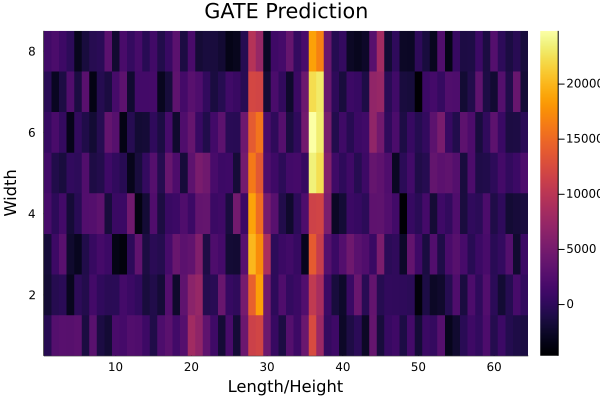

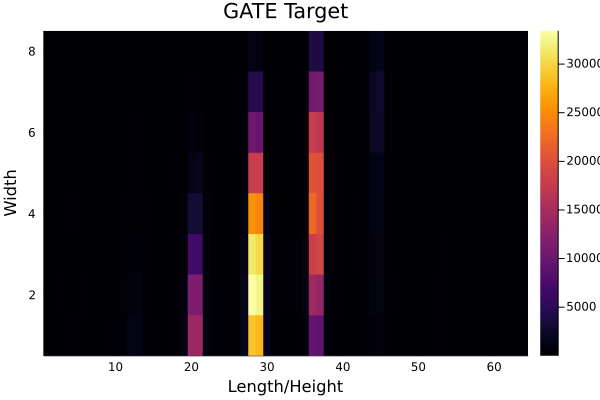

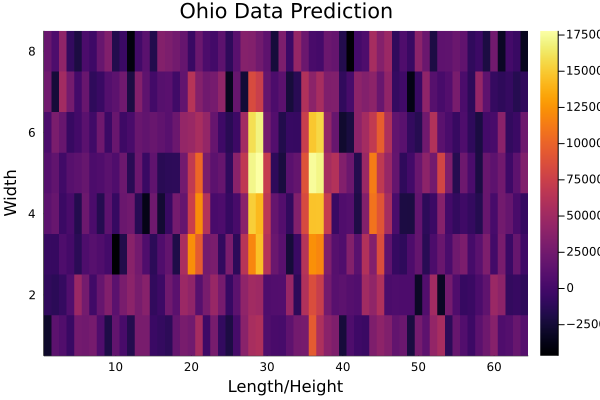

Training R2: 0.9108442720427801
Validation R2: 0.5059351667706375
10loss(trainingArray, targetArray) = 1.8831825f6
loss(trainingArray, targetArray) = 1.8810628f6
loss(trainingArray, targetArray) = 1.8790118f6
loss(trainingArray, targetArray) = 1.8769531f6
loss(trainingArray, targetArray) = 1.8748541f6
loss(trainingArray, targetArray) = 1.8727106f6
loss(trainingArray, targetArray) = 1.8705136f6
loss(trainingArray, targetArray) = 1.8682734f6
loss(trainingArray, targetArray) = 1.8659699f6


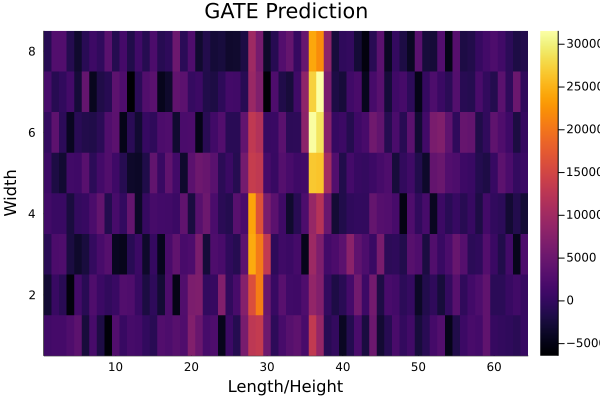

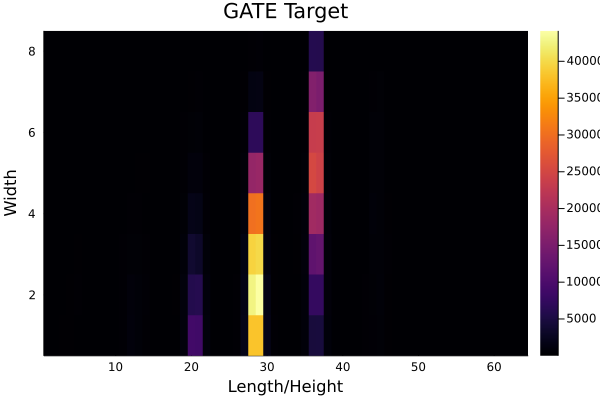

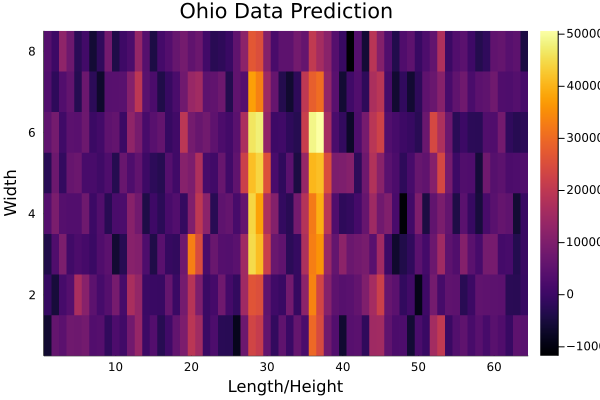

loss(trainingArray, targetArray) = 1.863607f6
Training R2: 0.9197201841267697
Validation R2: 0.5094193066959293
2

In [45]:
for i = 1:2
    Flux.train!(loss, params(m), dataset, opt, cb = throttle(evalcb, 2))
    CurrentR2 = r2(lm(@formula(A  ~ B), DataFrame(A=Float64.(m(trainingArray)[:,1]), B=targetArray[:,1])))
    print("Training R2: ", CurrentR2, '\n')
    CurrentVR2 = r2(lm(@formula(A  ~ B), DataFrame(A=Float64.(m(validationArray)[:,1]), B=validationTargetArray[:,1])))
    print("Validation R2: ", CurrentVR2, '\n')
    plotResults(m)
end

In [39]:
function writeOutput(m)
    readPath = "/home/jupyter-tegan/dosimeter/gate_data/bars/"
    readArray = filter(x->occursin(string("A000"), x), readdir(readPath))
    resize = size(readArray)[1]
    path = "/home/jupyter-tegan/dosimeter/neural_nets/JuliaOutputs/tegan_runs"
    runNumber = lpad(size(readdir(path))[1], 3, "0")
    path = string(path, "/Run", runNumber, "R2-", lpad(Int(round(CurrentVR2, digits=3),1000),3,"0"))
    mkdir(path)
    mkdir(string(path, "/fullSimulationOutputs"))
    mkdir(string(path, "/fullOhioOutputs"))
    for i = 1:size(validationTargetArray)[2]
        beamSize = filter(x->occursin(string("A000"), x), readdir(readPath))[div(100-1, div(size(validationTargetArray)[2],readSize))+1][1:8]

        writedlm(string(path,"/fullSimulationOutputs/ValidationTarget",lpad(i,3,"0"), "-", beamSize, ".txt"), reshape(validationTargetArray[:,i], (8*8,8)), " ")
        writedlm(string(path,"/fullSimulationOutputs/ValidationOutput",lpad(i,3,"0"), "-", beamSize, ".txt"), Int.(round.(reshape(m(validationArray)[:,i], (8*8,8)))), " ")
    end


    readPath = "/home/jupyter-tegan/dosimeter/gate_data/bars/"
    readArray = filter(x->occursin(string("A000"), x), readdir(readPath))
    for i = 1:size(inputArray)[4]
        writedlm(string(path,"/fullOhioOutputs/OhioOutput",lpad(i,3,"0"),".txt"), Int.(round.(reshape(m(inputArray)[:,i], (8*8,8)))), " ")
    end
end

writeOutput (generic function with 1 method)

In [40]:
writeOutput(m)

LoadError: MethodError: no method matching Int64(::Float64, ::Int64)
[0mClosest candidates are:
[0m  Int64(::Float64) at float.jl:719
[0m  (::Type{T})(::T) where T<:Number at boot.jl:760